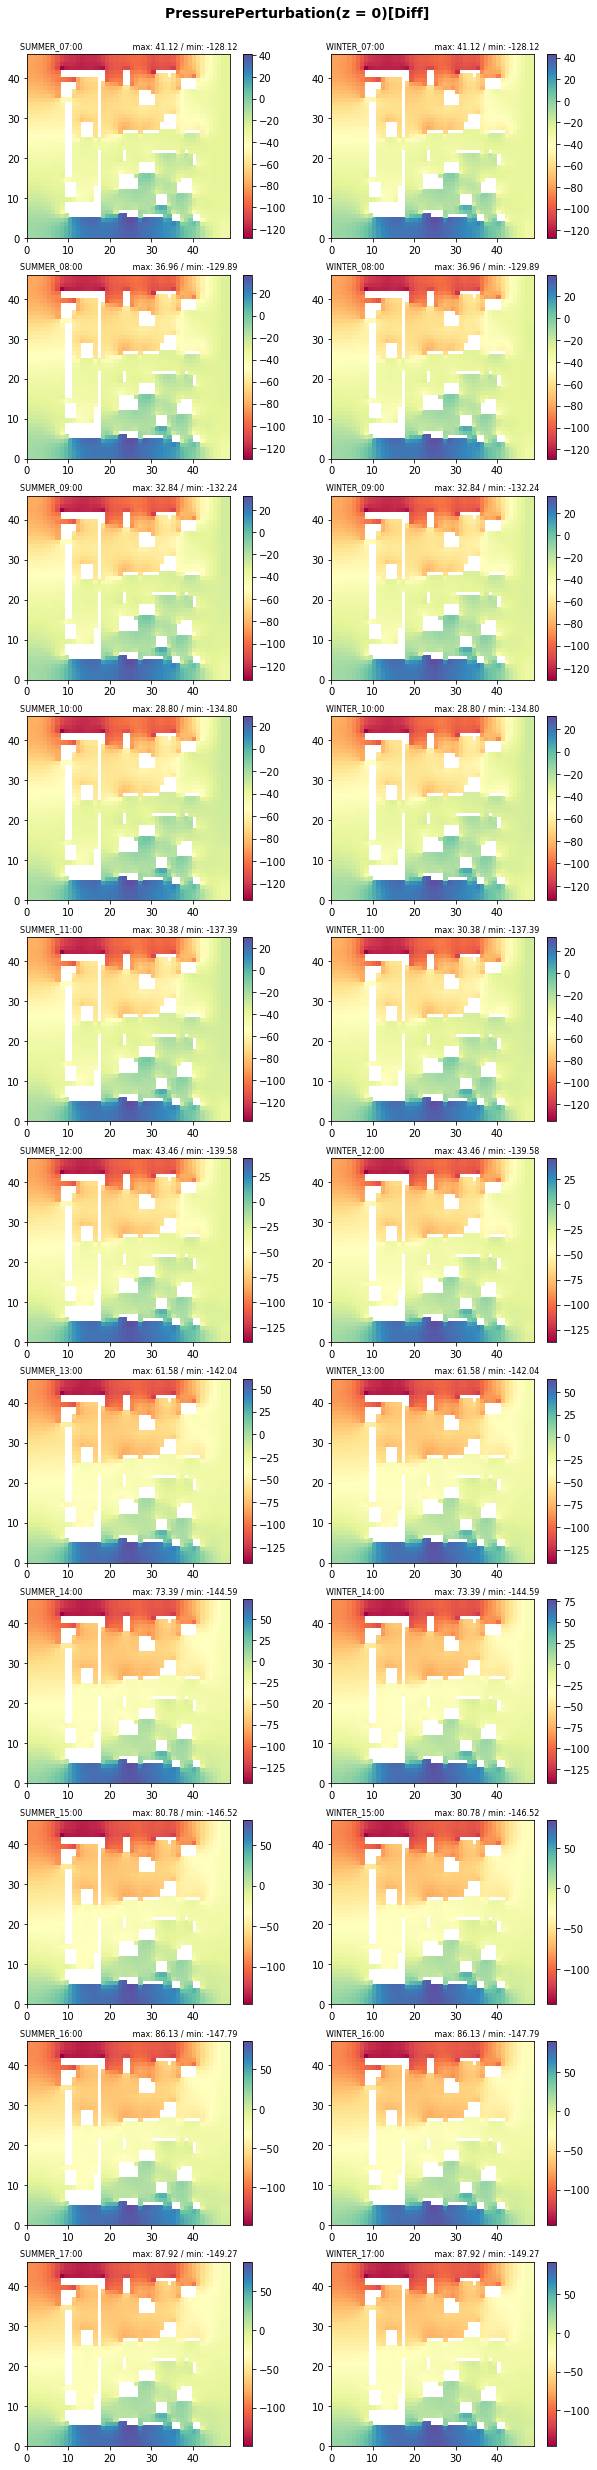

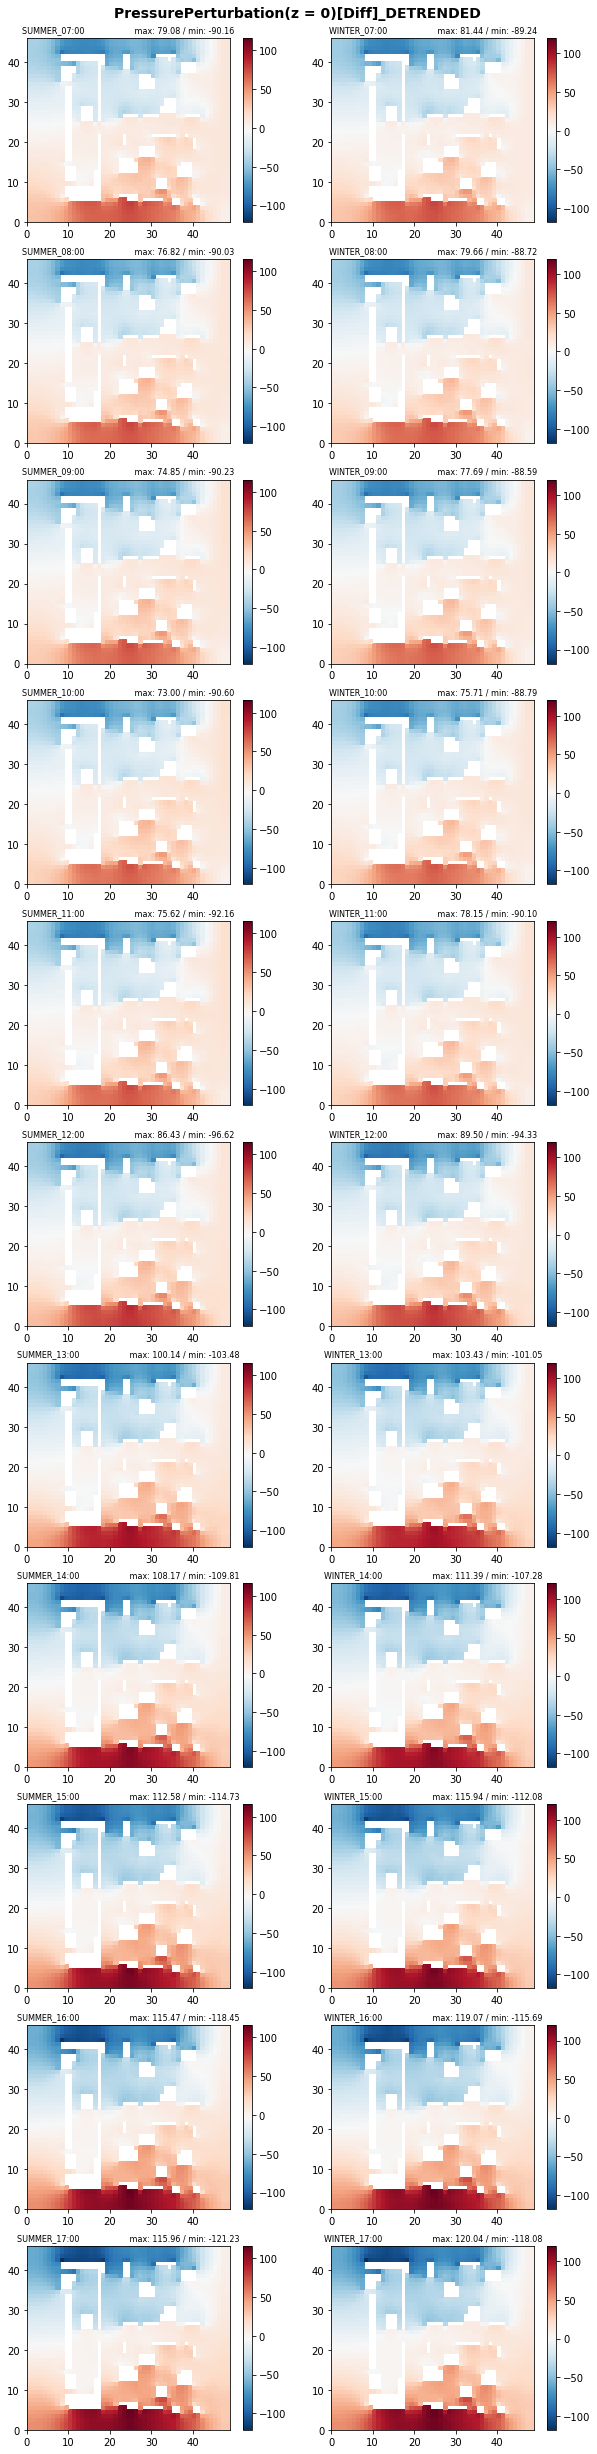

In [7]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import obspy

############### Setting ################
var = 'PressurePerturbation'
unit = 'Diff'
h = 0
cmap1 = plt.cm.Spectral
cmap2 = plt.cm.RdBu_r

######### DO NOT MODIFY #################
f_dir = 'C:\\Users\\ADMIN\\Desktop\\ENVI\\output\\'
f1_s = '\\SUMMER\\ATMO\\exp1_summer_AT_2018-12-21_'
f2_s = '.00.01.nc'
f1_w = '\\WINTER\\ATMO\\exp1_AT_2018-12-21_'
f2_w = '.00.01.nc'
f1_s_pmv = '\\SUMMER\\PMV\\exp1_summer_BIO_PMV_2018-12-21_'
f2_s_pmv = '.00.01.nc'
f1_w_pmv = '\\WINTER\\PMV\\exp1_BIO_PMV_2018-12-21_'
f2_w_pmv = '.00.01.nc'

############################# CHOOSE BETWEEN AT/BIO_MET FILE #################
dt_s = [nc.Dataset(f_dir + f1_s + f"{i:02}" + f2_s)[var][h,:,:] for i in range(7, 18)] 
#dt_s = [nc.Dataset(f_dir + f1_s_pmv + f"{i:02}" + f2_s_pmv)[var][h,:,:] for i in range(7, 18)]
dt_w = [nc.Dataset(f_dir + f1_w + f"{i:02}" + f2_w)[var][h,:,:] for i in range(7, 18)]
#dt_w = [nc.Dataset(f_dir + f1_w_pmv + f"{i:02}" + f2_w_pmv)[var][h,:,:] for i in range(7, 18)]

############################## MODIFY MISSING VALUES TO NAN #######################
f_PMV = nc.Dataset(f_dir + '\\SUMMER\\PMV\\exp1_summer_BIO_PMV_2018-12-21_07.00.01.nc')
PMV = f_PMV['PMV']

nz, ny, nx = np.shape(PMV)

BLDG = np.empty((ny, nx))
for y in range(ny):
    for x in range(nx):
        if PMV[h, y, x] <= -800:
            BLDG[y, x] = 1
        else:
            BLDG[y, x] = 0
            
def add_nan(data2d, bldg = BLDG):
    res = np.empty((ny, nx))
    for y in range(ny):
        for x in range(nx):
            if bldg[y, x] == 1:
                res[y,x] = np.NaN
            else:
                res[y,x] = 1.0*data2d[y,x]     
    return res

nan_s = [add_nan(data) for data in dt_s] # Raw_nanned
nan_w = [add_nan(data) for data in dt_w] # Raw_nanned

max_list_s = [np.nanmax(data) for data in nan_s]
max_list_w = [np.nanmax(data) for data in nan_w]
min_list_s = [np.nanmin(data) for data in nan_s] 
min_list_w = [np.nanmin(data) for data in nan_w]
max_list = [np.nanmax(data) for data in nan_s] + [np.nanmax(data) for data in nan_w]
min_list = [np.nanmin(data) for data in nan_s] + [np.nanmin(data) for data in nan_w]

#################### ORIGINAL PLOT ######################################

fig, axes = plt.subplots(11,2, figsize = (10, 44))

cmap = cmap1

for i, data in enumerate(nan_s):
    ax = axes[i,0]
    #pcm = ax.pcolormesh(data, cmap = cmap, vmin = min(min_list), vmax = max(max_list))  # Seasonal Variation
    #pcm = ax.pcolormesh(data, cmap = cmap, vmin = min(min_list_s), vmax = max(max_list_s)) # Daily Variation
    pcm = ax.pcolormesh(data, cmap = cmap, vmin = min_list_s[i], vmax = max_list_s[i]) # Regional Variation
    ax.set_title(f'SUMMER_{i+7:02}:00                    max: {max_list_s[i]:.02f} / min: {min_list_s[i]:.02f}', fontsize = 8)
    fig.colorbar(pcm, ax = ax)
    
    
#ig1.subplots_adjust(= 0.4)
#ig1.colorbar(im, ax = axes1.ravel().tolist())

for i, data in enumerate(nan_w):
    ax = axes[i,1]
    #pcm = ax.pcolormesh(data, cmap = cmap, vmin = min(min_list), vmax = max(max_list))  # Seasonal Variation
    #pcm = ax.pcolormesh(data, cmap = cmap, vmin = min(min_list_w), vmax = max(max_list_w))  # Daily Variation
    pcm = ax.pcolormesh(data, cmap = cmap, vmin = min_list_w[i], vmax = max_list_w[i]) # Regional Variation
    ax.set_title(f'WINTER_{i+7:02}:00                    max: {max_list_s[i]:.02f} / min: {min_list_s[i]:.02f}', fontsize = 8)
    fig.colorbar(pcm, ax = ax)
    
fig.suptitle(f'{var}(z = {h})[{unit}]', va = 'top', y = 0.895, fontsize = 14, fontweight = 'bold')

fig.savefig(f_dir + f'{var}_z{h}.png', dpi = 300)

######################### DETRENDED PLOT ##############################
avg_s = [np.nanmean(data) for data in nan_s]
avg_w = [np.nanmean(data) for data in nan_w]
detrend_s = [nan_s[i] - avg_s[i] for i in range(len(avg_s))]
detrend_w = [nan_w[i] - avg_s[i] for i in range(len(avg_w))]


max_detrend_s = [np.nanmax(data) for data in detrend_s]
max_detrend_w = [np.nanmax(data) for data in detrend_w]
min_detrend_s = [np.nanmin(data) for data in detrend_s]
min_detrend_w = [np.nanmin(data) for data in detrend_w]

max_detrend = [np.nanmax(data) for data in detrend_s] + [np.nanmax(data) for data in detrend_w]
min_detrend = [np.nanmin(data) for data in detrend_s] + [np.nanmin(data) for data in detrend_w]

fig_dev, axes_dev = plt.subplots(11,2, figsize = (10, 44))

cmap = cmap2

for i, data in enumerate(detrend_s):
    ax = axes_dev[i,0]
    pcm = ax.pcolormesh(data, cmap = cmap, vmin = min(min_detrend_s), vmax = max(max_detrend_s))
    ax.set_title(f'SUMMER_{i+7:02}:00                    max: {max_detrend_s[i]:.02f} / min: {min_detrend_s[i]:.02f}', fontsize = 8)
    fig.colorbar(pcm, ax = ax)
    
    
#ig1.subplots_adjust(= 0.4)
#ig1.colorbar(im, ax = axes1.ravel().tolist())

for i, data in enumerate(detrend_w):
    ax = axes_dev[i,1]
    pcm = ax.pcolormesh(data, cmap = cmap, vmin = min(min_detrend_w), vmax = max(max_detrend_w))
    ax.set_title(f'WINTER_{i+7:02}:00                    max: {max_detrend_w[i]:.02f} / min: {min_detrend_w[i]:.02f}', fontsize = 8)
    fig.colorbar(pcm, ax = ax)
    
fig_dev.suptitle(f'{var}(z = {h})[{unit}]_DETRENDED', va = 'top', y = 0.89, fontsize = 14, fontweight = 'bold')

fig_dev.savefig(f_dir + f'{var}_z{h}_detrended.png', dpi = 300)

In [3]:
nc.Dataset(f_dir + f1_s + f"{i:02}" + f2_s)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): nx(49), ny(46), nz(44)
    variables(dimensions): float64 nx(nx), float64 ny(ny), float64 nz(nz), float64 Objects(nz,ny,nx), float64 Flowu(nz,ny,nx), float64 Flowv(nz,ny,nx), float64 Floww(nz,ny,nx), float64 WindSpeed(nz,ny,nx), float64 WindSpeedChange(nz,ny,nx), float64 WindDirection(nz,ny,nx), float64 PressurePerturbation(nz,ny,nx), float64 PotentialAirTemperature(nz,ny,nx), float64 AirTemperatureDelta(nz,ny,nx), float64 AirTemperatureChange(nz,ny,nx), float64 SpecHumidity(nz,ny,nx), float64 RelativeHumidity(nz,ny,nx), float64 TKE(nz,ny,nx), float64 Dissipation(nz,ny,nx), float64 VerticalExchangeCoefImpuls(nz,ny,nx), float64 HorizontalExchangeCoefImpuls(nz,ny,nx), float64 VegetationLAD(nz,ny,nx), float64 DirectSwRadiation(nz,ny,nx), float64 DiffuseSwRadiation(nz,ny,nx), float64 ReflectedSwRadiation(nz,ny,nx), float64 TemperatureFlux(nz,ny,nx), float64 VapourFlux(nz,ny,nx), flo